In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [2]:
#import data
Data_path=r"C:\Users\mymag\OneDrive\Documents\Machine learning projects\Disease Prediction Using Machine Learning\Training.csv"
data=pd.read_csv(Data_path).dropna(axis=1)


In [3]:
disease_count=data['prognosis'].value_counts()
temp_df=pd.DataFrame({
    "diseases": disease_count.index,
    "counts":disease_count.values
})

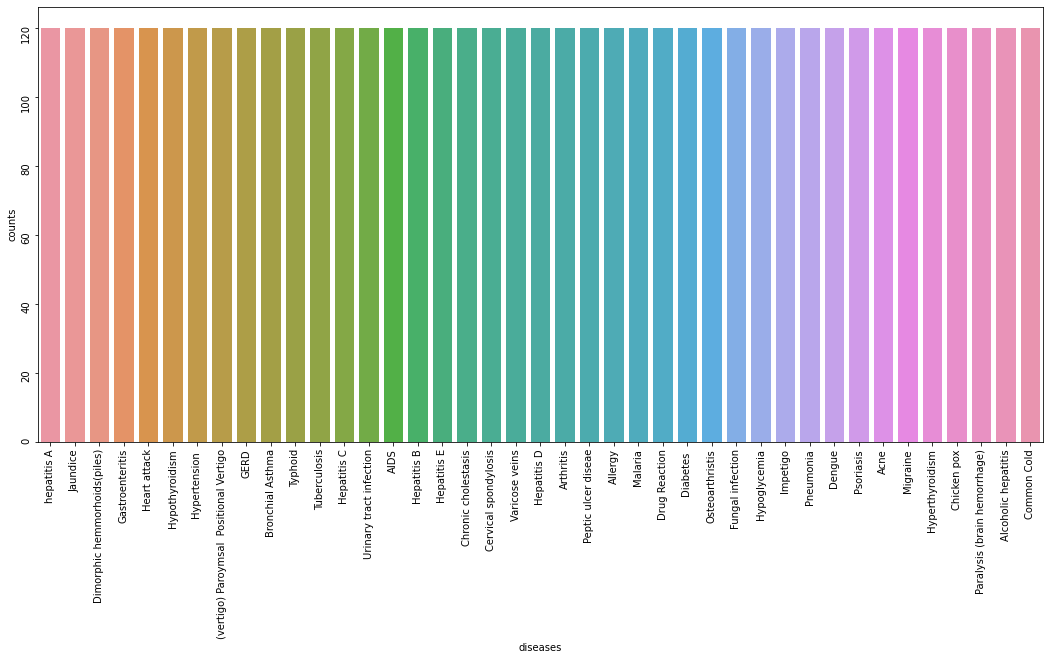

In [4]:
plt.figure(figsize=(18,8))
sns.barplot(x='diseases', y='counts', data=temp_df )
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

In [6]:
#encoding target value into numerical value
encode=LabelEncoder()
data['prognosis']=encode.fit_transform(data['prognosis'])

In [7]:
#train test data
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [8]:

def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, 
                             n_jobs = -1, 
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy of Train set by SVM classifier\:100.0
Accuracy on test data by svm classifier\:100.0


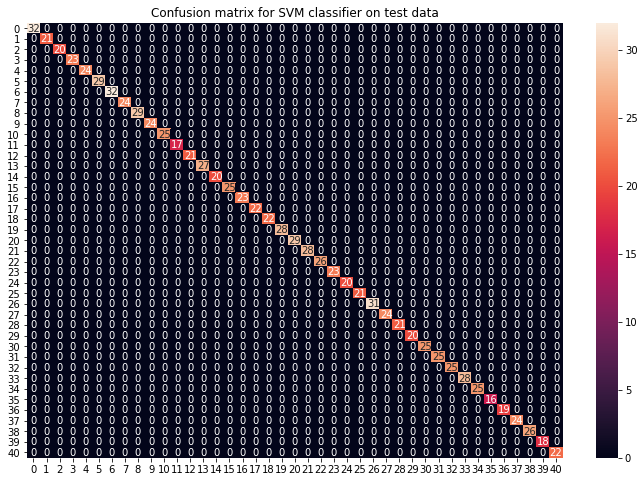

Accuracy on train data by naive bayes classifier\:100.0
Accuracy on test data by naive bayes classifier\:100.0


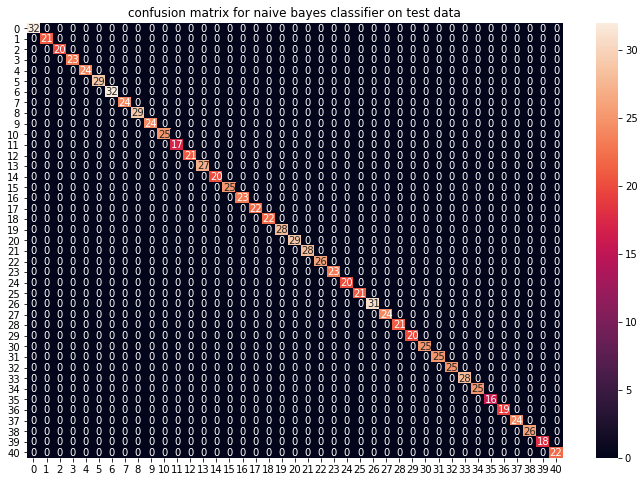

accuracy on train set for random forest classifier\:100.0
Accuracy for test set for random forrest classifier\:100.0


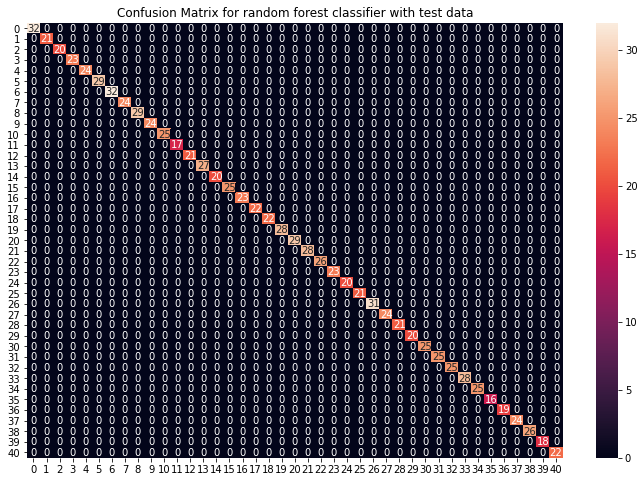

In [9]:
#training and testing SVM classifier
svm_model= SVC()
svm_model.fit(X_train,y_train)
preds=svm_model.predict(X_test)
print(f"Accuracy of Train set by SVM classifier\:{accuracy_score(y_train,svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by svm classifier\:{accuracy_score(y_test,preds)*100}")

cf_matrix=confusion_matrix(y_test,preds)

plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion matrix for SVM classifier on test data")
plt.show()

#training and testing naive bayes classifier
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
preds=nb_model.predict(X_test)
print(f"Accuracy on train data by naive bayes classifier\:{accuracy_score(y_train,nb_model.predict(X_train))*100}")
      
print(f"Accuracy on test data by naive bayes classifier\:{accuracy_score(y_test,preds)*100}")
cf_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("confusion matrix for naive bayes classifier on test data") 
plt.show()
      
#traning and testing data with random forest classifier
rf_model=RandomForestClassifier(random_state=18)
rf_model.fit(X_train,y_train)
preds=rf_model.predict(X_test)
      
print(f"accuracy on train set for random forest classifier\:{accuracy_score(y_train, rf_model.predict(X_train))*100}")
      
print(f"Accuracy for test set for random forrest classifier\:{accuracy_score(y_test,preds)*100}")
      
cf_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for random forest classifier with test data")      
plt.show()      


<ipython-input-12-829dda371335>:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_preds=[stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds,nb_preds,rf_preds)]


Accuracy on Test dataset by the combined model: 100.0


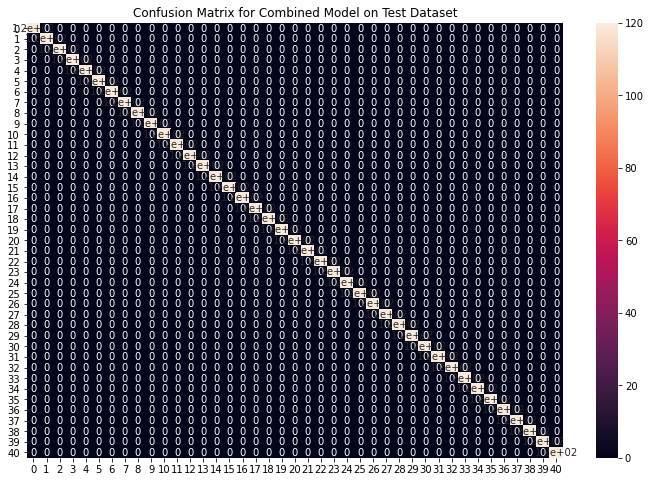

In [12]:
#training the models on full data
final_svm_model=SVC()
final_nb_model=GaussianNB()
final_rf_model=RandomForestClassifier(random_state=18)
#fitting the values in model
final_svm_model.fit(X,y)
final_nb_model.fit(X,y)
final_rf_model.fit(X,y)
#download test data
test_data=pd.read_csv(r"C:\Users\mymag\OneDrive\Documents\Machine learning projects\Disease Prediction Using Machine Learning\Training.csv").dropna(axis=1)
test_X=test_data.iloc[:,:-1]
test_Y=encode.transform(test_data.iloc[:,-1])
#making predictions by taking mode of predictions made by all classifier
svm_preds=final_svm_model.predict(test_X)
nb_preds=final_nb_model.predict(test_X)
rf_preds=final_rf_model.predict(test_X)


from scipy import stats
final_preds=[stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds,nb_preds,rf_preds)]
print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")
cf_matrix=confusion_matrix(test_Y,final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [14]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encode.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
        
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
    
    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    
    # making final prediction by taking mode of all predictions
    # Use statistics.mode instead of scipy.stats.mode
    import statistics
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))




{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}
